In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

In [3]:
def factor_function(sigma_i, i_neighbours, sigma_j, j_neighbours, permutation):
    """
    sigma_i: int, spin of the site i
    i_neighbours: list, spin of the neighbours of site i, size d-1
    sigma_j: int, spin of the site j
    j_neighbours: list, spin of the neighbours of site j, size d-1

    """
    final = 1
    total = 0
    
    if sigma_i == 1:
        total = sigma_j + np.sum(j_neighbours) + np.sum(i_neighbours) + np.sum(permutation)
        
        if total == 0:
            final *= 1
        else:
            return 0
    
    return final

In [4]:
def multiply_messages(i, i_neighbours, j, perm, d, psi):
    mult = 1
    for k in range(d-1):
        index = (i_neighbours[k],) + tuple(perm[k*(d-1):(k+1)*(d-1)]) + (i,) + (j,) + tuple(i_neighbours[:k]) + tuple(i_neighbours[k+1:])
        mult *= psi[index]
    return mult
        

In [11]:
def BP(d, mu=0, tol=1e-12, max_iter=10000, damping_parameter=0.8, verbose=0, init_psi=None):
    shape = tuple([2] * d + [2] * d)
    psi=np.zeros(shape)
    if init_psi is None:
        psi=np.random.uniform(size=shape)
        psi=psi/np.sum(psi)
    else:
        psi=init_psi.copy()
    
    permutations=np.array(list(itertools.product([0,1], repeat=(d-1)*(d-1))))
    indices_permutations = list(itertools.product([0,1], repeat=d*2))
    
    for t in range(max_iter):
        psi_new=np.zeros(shape)
        for indices in indices_permutations:
            i = indices[0]
            i_neighbours = indices[1:d]
            j = indices[d]
            j_neighbours = indices[d+1:]
            for perm in permutations:
                mult = 1
                if factor_function(i, i_neighbours, j, j_neighbours, perm)==0:
                    continue
                mult = multiply_messages(i, i_neighbours, j, perm, d, psi)
                psi_new[indices] += np.exp(mu*i)*mult
                    
        if np.sum(psi_new)!=0:
            psi_new=psi_new/np.sum(psi_new)
        else:
            psi_new=np.ones(shape)/np.prod(shape)
        
        psi_new=damping_parameter*psi+(1-damping_parameter)*psi_new
        
        Delta=np.linalg.norm(psi_new-psi)
        if verbose==2 and t%100==0:
            print("Iter : ", t+1, " Delta : ", Delta)
        psi=psi_new
        if Delta<tol:
            break
    
    if t==max_iter-1:
        print("No convergence"+" ! Final error: "+ str(Delta))
    else:
        if verbose>=1:
            print("Converged ! Number of iteration "+str(t))
    
    return psi

In [12]:
test_messages = BP(3, mu=6, tol=1e-12, max_iter=10000, damping_parameter=0.6, verbose=0)

In [13]:
print(np.round(test_messages,3))

[[[[[[0.025 0.025]
     [0.025 0.025]]

    [[0.025 0.025]
     [0.025 0.025]]]


   [[[0.059 0.059]
     [0.059 0.059]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.059 0.059]
     [0.059 0.059]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]




 [[[[[0.328 0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]]


In [54]:
test_messages_playground = test_messages.copy()
test_messages_playground[0,0,1,0,0,0] = 1
print(np.round(test_messages_playground,3))

[[[[[[0.034 0.034]
     [0.034 0.034]]

    [[0.034 0.034]
     [0.034 0.034]]]


   [[[1.    0.058]
     [0.058 0.058]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.058 0.058]
     [0.058 0.058]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]




 [[[[[0.259 0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]]


In [56]:
test_messages_playground = test_messages.copy()
for i in range(2):
    for j in range(2):
        for k in range(2):
            test_messages_playground[0, 0, 0, i,j,k] = 1
print(np.round(test_messages_playground,3))

[[[[[[1.    1.   ]
     [1.    1.   ]]

    [[1.    1.   ]
     [1.    1.   ]]]


   [[[0.058 0.058]
     [0.058 0.058]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.058 0.058]
     [0.058 0.058]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]




 [[[[[0.259 0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]]


In [62]:
test_messages_playground = test_messages.copy()
for j in range(2):
    for k in range(2):
        test_messages_playground[0, 0, 1, 0,j,k] = 1
for j in range(2):
    for k in range(2):
        test_messages_playground[0, 1, 0, 0,j,k] = 1
print(np.round(test_messages_playground,3))

[[[[[[0.034 0.034]
     [0.034 0.034]]

    [[0.034 0.034]
     [0.034 0.034]]]


   [[[1.    1.   ]
     [1.    1.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[1.    1.   ]
     [1.    1.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]




 [[[[[0.259 0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]]


In [64]:
test_messages_playground = test_messages.copy()
test_messages_playground[1,0,0,0,0,0] = 1
print(np.round(test_messages_playground,3))

[[[[[[0.034 0.034]
     [0.034 0.034]]

    [[0.034 0.034]
     [0.034 0.034]]]


   [[[0.058 0.058]
     [0.058 0.058]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.058 0.058]
     [0.058 0.058]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]




 [[[[[1.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]



  [[[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]


   [[[0.    0.   ]
     [0.    0.   ]]

    [[0.    0.   ]
     [0.    0.   ]]]]]]


In [6]:
def update_observables(psi, mu, d=3):
        phi_=0
        phi__=0

        permutations=np.array(list(itertools.product([0,1], repeat=(d-1)*(d-1))))
        indices_permutations = list(itertools.product([0,1], repeat=d*2))
        
        numerator=0
        
        for indices in indices_permutations:
            i = indices[0]
            i_neighbours = indices[1:d]
            j = indices[d]
            j_neighbours = indices[d+1:]
            for perm in permutations:
                mult=1
                if factor_function(i, i_neighbours, j, j_neighbours, perm)==0:
                    continue
                mult=multiply_messages(i, i_neighbours, j, perm, d, psi)
                last_message_idx = (j,) + tuple(j_neighbours) + (i,) + tuple(i_neighbours)
                mult*=psi[last_message_idx]
                phi_+=np.exp(mu*i)*mult
                numerator+=i*mult*np.exp(mu*i)
                
            entropy_idx_left = (i,) + tuple(i_neighbours) + (j,) + tuple(j_neighbours)
            entropy_idx_right = (j,) + tuple(j_neighbours) + (i,) + tuple(i_neighbours)
            phi__+=psi[entropy_idx_left]*psi[entropy_idx_right]

        if phi_==0:
            phi_=1e-16
        if phi__==0:
            phi__=1e-16
        phi=np.log(phi_)-d/2*np.log(phi__)

        if numerator==0:
            rho=0
        else:
            rho=numerator/phi_
            
        s=phi-mu*rho

        return phi, rho, s

In [8]:
mu_space = np.linspace(0, 10, 100)
d = 4
phi_list = []
rho_list = []
s_list = []
for mu in tqdm(mu_space):
    psi = BP(d, mu=mu, verbose=0, max_iter=500, tol=1e-12, damping_parameter=0.7, init_psi=None)
    phi, rho, s = update_observables(psi, mu, d)
    phi_list.append(phi)
    rho_list.append(rho)
    s_list.append(s)

  3%|▎         | 3/100 [02:47<1:30:03, 55.70s/it]


KeyboardInterrupt: 

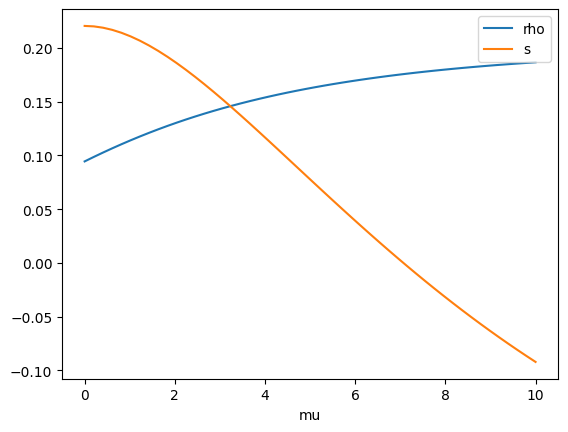

In [75]:
plt.plot(mu_space, rho_list, label='rho')
plt.plot(mu_space, s_list, label='s')
plt.xlabel('mu')
plt.legend()
plt.show()

In [10]:
def find_zero_bisection(arr):
    # Function to find zero using bisection method
    left = 0
    right = len(arr) - 1
    if(arr[left]*arr[right] > 0):
        print("No zero crossing found")
        return -1

    while right - left > 1:
        mid = (left + right) // 2
        if arr[mid] == 0:
            return mid  # Zero found at index 'mid'
        elif arr[mid] * arr[left] < 0:
            right = mid
        else:
            left = mid

    # If exact zero not found, return the index closest to zero
    return left if abs(arr[left]) < abs(arr[right]) else right

In [11]:
def complete_run(d, mu_space, verbose=0, max_iter=10000, damping_parameter=0.8):
    phi_list = []
    rho_list = []
    s_list = []
    for mu in mu_space:
        psi = BP(d, mu=mu, verbose=verbose, max_iter=max_iter, damping_parameter=damping_parameter)
        phi, rho, s = update_observables(psi, mu, d)
        phi_list.append(phi)
        rho_list.append(rho)
        s_list.append(s)

    zero_index = find_zero_bisection(s_list)
    if zero_index == -1:
        return -1
    return rho_list[zero_index]

In [12]:
find_zero_bisection(s_list)
print(rho_list[find_zero_bisection(s_list)])

No zero crossing found
No zero crossing found
0.09862185251373098


In [13]:
d_list = [4, 5, 6, 7]
densest_packings = {}
mu_space = np.linspace(3, 9, 100)
for d in tqdm(d_list):
    densest_packings[d] = complete_run(d, mu_space, max_iter=10000, damping_parameter=0.7)
    print("Densest packing for d = ", d, " is ", densest_packings[d])

  0%|          | 0/4 [4:42:19<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
print(densest_packings)

{3: 0.23548975165587643}
